### b. 以人眼去除 果樹 圖片, 只剩 (水果), 訓練後的準確率 61%.

In [ ]:
# 載入圖檔處理
import glob
import os
import cv2 # pip install opencv-python

In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Keras functions
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adadelta

Using TensorFlow backend.


In [5]:
# 載入並讀取 image 及 label id, target lable
def load_dataset(path):
    temp_img = []
    temp_label = []
    for os_path in glob.glob(path):
        img_label = os_path.split("/")[-1]
        for image_path in glob.glob(os.path.join(os_path, "*.jpg")):
            image = cv2.imread(image_path, cv2.IMREAD_COLOR)
            image = cv2.resize(image, (64, 64))
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            temp_img.append(image)
            temp_label.append(img_label.split("\\")[-1])
    
    temp_id = {v:k for k,v in enumerate(np.unique(np.array(temp_label)))}    
    label_id = np.array([temp_id[i] for i in np.array(temp_label)])
    target_label = {v:k for k,v in temp_id.items()}

    return np.array(temp_img), label_id, target_label

In [6]:
x_train, y_train, target_label = load_dataset("FruitsImage/Training/*")

In [7]:
x_train.shape, len(x_train), len(y_train), len(target_label)

((1653, 64, 64, 3), 1653, 1653, 14)

In [8]:
x_test, y_test, _ = load_dataset("FruitsImage/Test/*")

In [9]:
x_test.shape, len(x_test), len(y_test), len(_)

((515, 64, 64, 3), 515, 515, 14)

In [10]:
# 資料整理 正規化 將資料線性單位化至  [0,1] 。
x_train = (x_train - x_train.min()) / (x_train.max() - x_train.min())
x_test = (x_test - x_test.min()) / (x_test.max() - x_test.min())

y_train = keras.utils.to_categorical(y_train, 14)
y_test = keras.utils.to_categorical(y_test, 14)

(64, 64, 3)


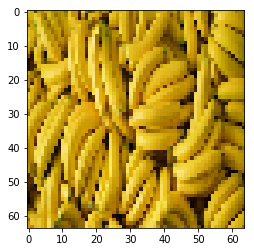

In [11]:
# 看看圖片樣子
print(x_train[300].shape)
plt.imshow(x_train[300])
plt.show()

In [12]:
# 建構我們的神經網路
model = Sequential()

# filter, 矩陣
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(64, 64, 3))) # padding 設成 same 是每個 filter 會輸出原來 64*64 一樣大小的矩陣。
model.add(Activation('relu'))
model.add(BatchNormalization())
# Max-Pooling!
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# 將資料拉平成
model.add(Flatten())
# 神經元
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5)) # Dropout 在訓練中每次更新時， 將輸入單元的按比率隨機設置為 0，有助於防止過擬合
model.add(Dense(14))
model.add(Activation('softmax'))

# 檢視我們的神經網路
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
activation_2 (Activat

In [13]:
model.compile(loss="categorical_crossentropy", optimizer=Adadelta(), metrics=['accuracy'])

In [14]:
model_fit = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1653 samples, validate on 515 samples
Epoch 1/10
1653/1653 [==============================] - 48s 29ms/step - loss: 3.3912 - acc: 0.2946 - val_loss: 1.7787 - val_acc: 0.4252
Epoch 2/10
1653/1653 [==============================] - 41s 25ms/step - loss: 1.6898 - acc: 0.4628 - val_loss: 1.4573 - val_acc: 0.5417
Epoch 3/10
1653/1653 [==============================] - 41s 25ms/step - loss: 1.4438 - acc: 0.5185 - val_loss: 1.3762 - val_acc: 0.5515
Epoch 4/10
1653/1653 [==============================] - 43s 26ms/step - loss: 1.2505 - acc: 0.5802 - val_loss: 1.3220 - val_acc: 0.5650
Epoch 5/10
1653/1653 [==============================] - 45s 27ms/step - loss: 1.0644 - acc: 0.6413 - val_loss: 1.5210 - val_acc: 0.5340
Epoch 6/10
1653/1653 [==============================] - 42s 25ms/step - loss: 0.9765 - acc: 0.6751 - val_loss: 1.2612 - val_acc: 0.5903
Epoch 7/10
1653/1653 [==============================] - 42s 25ms/step - loss: 0.8544 - ac

Test loss: 1.2687490463256836
Test accuracy: 0.6174757281553398


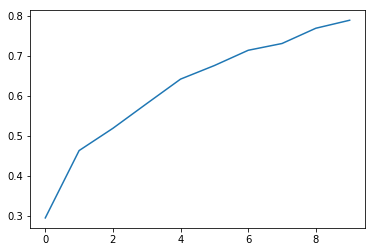

In [15]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.plot(model_fit.history["acc"])

In [24]:
# 實際照片辨識
from keras.preprocessing import image

img_path = 'FruitsImage/Images/6000198083646.jpg'

img = image.load_img(img_path, target_size=(64, 64))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)

In [25]:
# 正規化 將資料線性單位化至  [0,1] 。
img_arr = (img_arr - img_arr.min()) / (img_arr.max() - img_arr.min())

In [26]:
predict = model.predict_classes(img_arr)

'Pineapple'

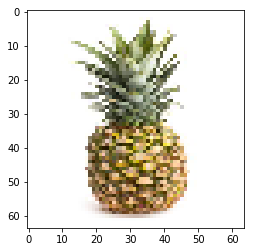

In [27]:
plt.imshow(img, cmap='Greys')
target_label[predict[0]]